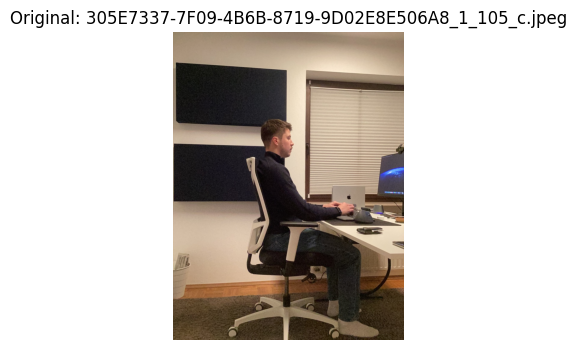

I0000 00:00:1738494523.280401 1065329 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1738494523.321470 1760387 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738494523.345107 1760383 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


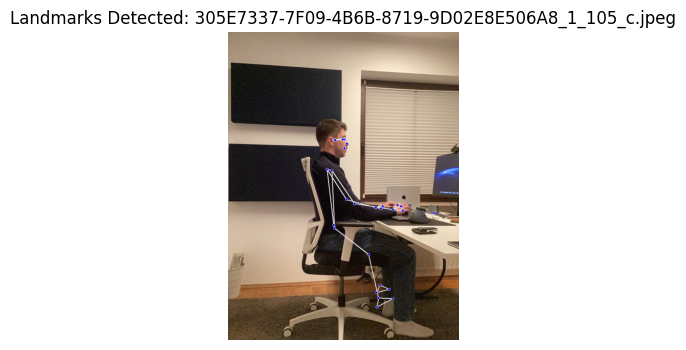

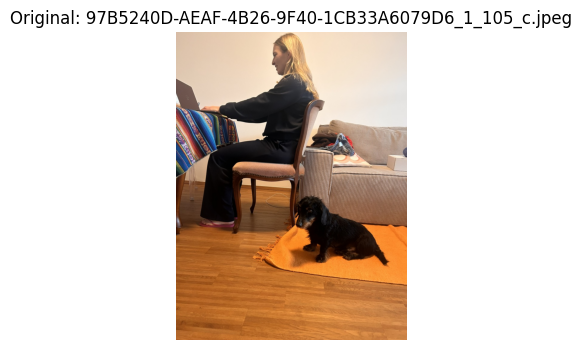

I0000 00:00:1738494523.511627 1065329 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro
W0000 00:00:1738494523.552440 1760396 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738494523.576202 1760396 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


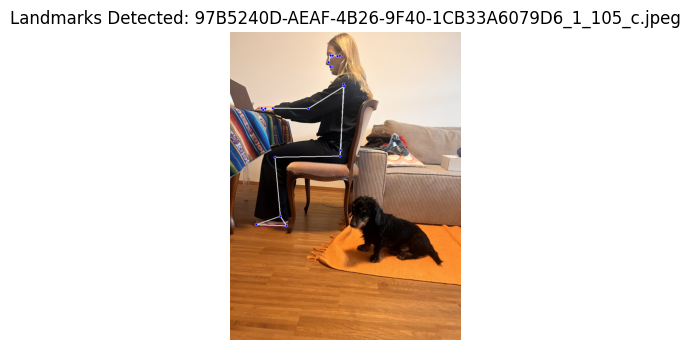

2025-02-02 12:08:43,680 [INFO] === EDA SUMMARY ===
2025-02-02 12:08:43,681 [INFO] Total images found in '../data/raw_images': 2
2025-02-02 12:08:43,681 [INFO] Images with pose landmarks detected: 2
2025-02-02 12:08:43,681 [INFO] Process complete.


In [3]:
# EDA.py
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import mediapipe as mp
import logging

logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

def is_valid_image(file_path):
    valid_types = ("jpeg", "png", "jpg")
    img_type = imghdr.what(file_path)
    if img_type not in valid_types:
        return False
    img = cv2.imread(file_path)
    if img is None:
        return False
    return True

def run_eda_on_images(image_dir="../data/raw_images"):
    if not os.path.exists(image_dir):
        logging.error(f"Directory '{image_dir}' does not exist.")
        return

    image_files = [f for f in os.listdir(image_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    total_images = len(image_files)
    detected_count = 0

    for img_file in image_files:
        file_path = os.path.join(image_dir, img_file)

        if not is_valid_image(file_path):
            logging.warning(f"'{img_file}' is not a valid or loadable image.")
            continue

        image_bgr = cv2.imread(file_path)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(4,4))
        plt.imshow(image_rgb)
        plt.title(f"Original: {img_file}")
        plt.axis("off")
        plt.show()

        with mp_pose.Pose(
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            min_detection_confidence=0.7,
            min_tracking_confidence=0.7
        ) as pose_detector:
            results = pose_detector.process(image_rgb)

        if results.pose_landmarks:
            detected_count += 1
            annotated = image_rgb.copy()
            mp_drawing.draw_landmarks(
                annotated,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS
            )

            plt.figure(figsize=(4,4))
            plt.imshow(annotated)
            plt.title(f"Landmarks Detected: {img_file}")
            plt.axis("off")
            plt.show()
        else:
            logging.info(f"No landmarks detected in '{img_file}'.")

    logging.info("=== EDA SUMMARY ===")
    logging.info(f"Total images found in '{image_dir}': {total_images}")
    logging.info(f"Images with pose landmarks detected: {detected_count}")
    logging.info("Process complete.")

if __name__ == "__main__":
    run_eda_on_images("../data/raw_images")